# Lekce 11: Typy extrémů a volné lokální extrémy

Nejdříve načtěme nutné balíčky.

In [1]:
using LinearAlgebra
using Plots

# Definitnost matic

V podmínkách optimality druhého řádu se vyskytuje (semi)definitnost matice Hessiánu. Víme, že čtvercová symetrická reálná matice je pozitivně definitní, právě když jsou všechna její vlastní čísla kladná. Následující funkce `matrix_type_wrong` vypíše typ matice podle jejích vlastních čísel `eigvals(A)`. Tato implementace má nejméně dvě chyby. Najdete je?

In [2]:
function matrix_type_wrong(A)
    if size(A)[1] !== size(A)[2]
        error("Only square matrices allowed")
    end
    λs = eigvals(A)
    if minimum(λs) > 0
        println("A is positive definite")
    elseif minimum(λs) >= 0
        println("A is positive semidefinite")
    elseif maximum(λs) < 0
        println("A is negative definite")
    elseif maximum(λs) <= 0
        println("A is negative semidefinite")
    else
        println("A is indefinite")
    end
    return λs
end;

První problem je, že tento výpočet funguje pouze pro reálné symetrické matice. To je snadno opravitelné tím, že využijeme rovnosti $$x^\top Ax = \frac12 x^\top (A+A^\top)x.$$ Jinými slovy, matice $A$ je pozitivně definitní právě tehdy, když $A+A^\top$ je pozitivně definitní.

In [3]:
function matrix_type(A::AbstractMatrix{T}) where T<:Real
    if size(A)[1] !== size(A)[2]
        error("Only square matrices allowed")
    end
    A = 1/2*(A+A')
    λs = eigvals(A)
    if minimum(λs) > 0
        println("A is positive definite")
    elseif minimum(λs) >= 0
        println("A is positive semidefinite")
    elseif maximum(λs) < 0
        println("A is negative definite")
    elseif maximum(λs) <= 0
        println("A is negative semidefinite")
    else
        println("A is indefinite")
    end
    return λs
end;

Druhý problém jsou numerické chyby. Pro matici $$A = \begin{pmatrix} 1 & 1& 1 \\ 1&1&1 \\ 1&1&1 \end{pmatrix}$$ platí $$x^\top Ax = (x_1+x_2+x_3)^2\ge 0$$ a tedy tato matice je pozitivně semidefinitní.

In [4]:
A = ones(3,3)
λs = matrix_type(A);

A is indefinite


Vidíme ale, že námi napsaná funkce nám ukázala, že matice je indefinitní.

In [5]:
λs

3-element Array{Float64,1}:
 -5.624168597199657e-16
  7.305347407387203e-18
  2.9999999999999996

Když vypíšeme vlastní čísla, vidíme, že matice má dvě nulová vlastní čísla. Jedno z nich je ale trochu záporné a tedy matice podle podmínek ve funkci `matrix_type` byla vyhodnocena jako indefinitní. Tomuto by šlo předejít změnou `minimum(λs) > 0` na `minimum(λs) > ϵ` pro nějaké malé `ϵ`.

# Podmínky druhého řádu

Ukážeme si postačující podmínky druhého řádu na minimalizaci dvourozměrné kvadratické funkce $f(x)=x^\top Ax$ na $[-2,2]^2$. Volíme kvadratickou funkci, neboť (pro symetrickou $A$) se její Hessián rovná $f''(x)=A$. Víme, že $f'(0)=0$ a tedy $0$ je stacionární bod. Bude nás zajímat, kdy je tento bod lokálním extrémem. Zadefinujme intervaly a příslušnou funkci.

In [6]:
xs = ys = -2:0.01:2
f(x,A) = x'*A*x;

Začněme s $A_1=\begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix}$. Vidíme, že matice má obě vlastní čísla kladná. Podmínky druhého řádu říkají, že nula je lokálním minimem.

In [7]:
A1 = [1 0; 0 1]
λs = matrix_type(A1)

A is positive definite


2-element Array{Float64,1}:
 1.0
 1.0

Pokračujme s $A_2=\begin{pmatrix} -1 & 0 \\ 0 & -1\end{pmatrix}$. Vidíme, že matice má obě vlastní čísla záporná. Podmínky druhého řádu říkají, že nula je lokálním maximem.

In [8]:
A2 = [-1 0; 0 -1]
λs = matrix_type(A2)

A is negative definite


2-element Array{Float64,1}:
 -1.0
 -1.0

Skončeme s $A_3=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}$. Vidíme, že matice má jedno vlastní číslo kladné a jedno záporné. Podmínky druhého řádu říkají, že nula není lokálním extrémem.

In [9]:
A3 = [1 0; 0 -1]
λs = matrix_type(A3)

A is indefinite


2-element Array{Float64,1}:
 -1.0
  1.0

Vykreslení všech tří funkcí ukazuje graficky znázorňuje tyto výsledky.

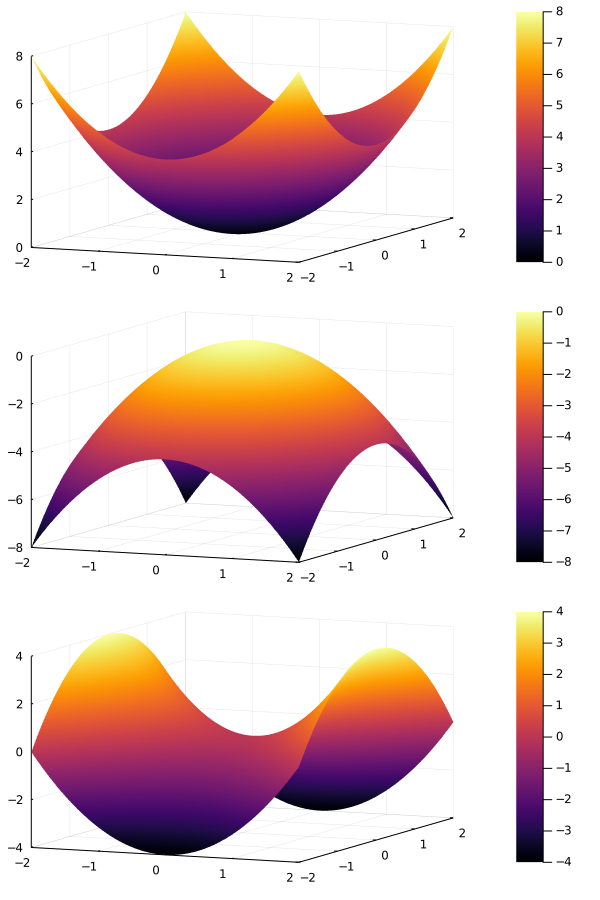

In [10]:
plt1 = surface(xs, ys, (x,y) -> f([x;y], A1))
plt2 = surface(xs, ys, (x,y) -> f([x;y], A2))
plt3 = surface(xs, ys, (x,y) -> f([x;y], A3))

plot(plt1, plt2, plt3; layout=(3,1), size=(600,900))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*